# FINAL PROJECT - DATA VISULIZATION
## Nhóm 3
- Thành viên: 
1. 22127064 − Phạm Thành Đạt
2. 22127225 − Trần Thị Thiên Kim
3. 22127357 − Phạm Trần Yến Quyên
4. 22127374 − Lê Thanh Tâm
5. 22127449 − Mai Đức Vân

# LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from bs4 import BeautifulSoup # xử lý HTML
import re

# ABOUT THE DATASET
- Dataset `vietnamese-job-posting` có 2056 records được lấy từ các bài đăng tuyển dụng trên trang web `careerbuilder.vn` vào khoảng thời gian từ **tháng 2 → 3 năm 2023**, bao gồm tổng cộng 20 cột:
1. `job_title`            
2. `job_id`              
3. `job_url`                 
4. `company_title`
5. `company_url`
6. `company_video_url`   
7. `salary`
8. `location`          
9. `outstanding_welfare`
10. `announcement_date`
11. `category`
12. `position`
13. `exp`
14. `order`
15. `expiration_date`
16. `detailed_welfare`
17. `job_description`
18. `job_requirements`
19. `other_info`
20. `job_tags`

## Import the dataset

In [444]:
# File paths
file_path_new = 'Data/cleaned_vietnamese_job_posting.csv'
file_path_old = 'Data/vietnamese-job-posting.csv'

# Read the CSV file
df = pd.read_csv(file_path_old, encoding='utf-8', quoting=csv.QUOTE_ALL, on_bad_lines='skip')

In [ ]:
# Info dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_title            2056 non-null   object
 1   job_id               2056 non-null   object
 2   job_url              2056 non-null   object
 3   company_title        2056 non-null   object
 4   company_url          2056 non-null   object
 5   company_video_url    672 non-null    object
 6   salary               2056 non-null   object
 7   location             2056 non-null   object
 8   outstanding_welfare  1991 non-null   object
 9   announcement_date    2056 non-null   object
 10  category             1945 non-null   object
 11  position             1945 non-null   object
 12  exp                  1945 non-null   object
 13  order                1945 non-null   object
 14  expiration_date      1697 non-null   object
 15  detailed_welfare     1896 non-null   object
 16  job_de

## Cleaning and reformating the dataset
- Vì Dataset có format rất lạ (một số cột còn có `HTML` trong data) nên cần xử lý các tag HTML để đưa về plain text.

In [ ]:
# Hàm loại HTML
def clean_html(html_text):
    if pd.isna(html_text):  # Xử lý giá trị NaN
        return html_text
    soup = BeautifulSoup(html_text, 'html.parser')
    return soup.get_text(separator=' ', strip=True)

# Hàm loại các cụm từ không mong muốn/dư thừa
def clean_text(text):
    if pd.isna(text):  # Xử lý giá trị NaN
        return text
    # Danh sách các cụm từ cần loại bỏ
    phrases = [
        r'Mô tả Công việc\s*[-:]*\s*',  # "Mô tả Công việc", "Mô tả Công việc -", v.v.
        r'Yêu Cầu Công Việc\s*[-:–]*\s*',  # "Yêu Cầu Công Việc", "Yêu Cầu Công Việc –", v.v.
        r'Yêu cầu\s*[-:–]*\s*',  # "Yêu cầu", "Yêu cầu:", "Yêu cầu –", v.v.
        """
        r'Quyền lợi\s*[-:]*\s*',  # "Quyền lợi", "Quyền lợi:", v.v.
        r'Thông tin khác\s*[-:]*\s*',  # "Thông tin khác", v.v.
        r'Thời gian, địa điểm làm việc\s*[-:]*\s*',  # "Thời gian, địa điểm làm việc", v.v.
        r'Yêu cầu\s*[-:]*\s*',  # "Yêu cầu", "Yêu cầu:", v.v.
        r'Địa điểm, thời gian làm việc\s*[-:]*\s*',  # "Địa điểm, thời gian làm việc", v.v. 
        """ # THÔNG TIN TRÊN CÁC CỘT NÀY RẤT PHỨC TẠP, PHẢI XỬ LÝ BẰNG PHƯƠNG PHÁP NLP (ON HOLD)
    ]
    # Kết hợp các cụm từ thành một mẫu regex
    pattern = '|'.join(phrases)
    # Loại bỏ các cụm từ
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    # Loại bỏ biểu tượng dấu đầu dòng (•) và khoảng trắng xung quanh
    cleaned_text = re.sub(r'\s*•\s*', ' ', cleaned_text)
    # Loại bỏ khoảng trắng thừa và chuẩn hóa
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Làm sạch HTML
columns_to_clean = ['job_description', 'job_requirements', 'other_info']
for column in columns_to_clean:
    df[column] = df[column].apply(clean_html)

# Làm sạch văn bản để loại bỏ các cụm từ không mong muốn
for column in columns_to_clean:
    df[column] = df[column].apply(clean_text)

# Loại bỏ thông tin không cần thiết/phức tạp
columns_to_drop = ['company_video_url', 'company_url', 'job_url', 'other_info', 'announcement_date', 'expiration_date']
for column in columns_to_drop:
    df = df.drop(column, axis=1) 

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12656\3758404106.py:17: SyntaxWarning: invalid escape sequence '\s'
  """


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_title            2056 non-null   object
 1   job_id               2056 non-null   object
 2   company_title        2056 non-null   object
 3   salary               2056 non-null   object
 4   location             2056 non-null   object
 5   outstanding_welfare  1991 non-null   object
 6   category             1945 non-null   object
 7   position             1945 non-null   object
 8   exp                  1945 non-null   object
 9   order                1945 non-null   object
 10  detailed_welfare     1896 non-null   object
 11  job_description      2038 non-null   object
 12  job_requirements     2038 non-null   object
 13  job_tags             1554 non-null   object
dtypes: object(14)
memory usage: 225.0+ KB


# PRE-PROCESSING
- Bao gồm:  
1. Xử lý Salary: Trích xuất `min_salary_mil_vnd` và `max_salary_mil_vnd` từ các dataset, xử lý range, định dạng 'Trên ${X}$', 'Dưới ${X}$' và 'Cạnh tranh'.
2. Xử lý Experience: Trích xuất `min_experience_years` và `max_experience_years`, xử lý range, 'Trên ${X}$', 'Dưới ${X}$', năm cụ thể và giá trị như 'Không có kinh nghiệm'.
3. Xử lý Location: Trích xuất `primary_location` của các mẫu có nhiều vị trí.
4. Kiểm tra trùng lặp data: Tìm `job_ids` trùng lặp.

In [ ]:
# --- Các hàm tiền xử lý ---
# Hàm trích xuất thông tin mức lương
def extract_salary_refined(salary_str):
    if pd.isna(salary_str):
        return np.nan, np.nan
    salary_str = salary_str.replace('Lương:', '').replace('VND', '').strip()
    salary_str = salary_str.replace(',', '.') # Xử lý dấu phẩy thập phân

    min_salary_mil = np.nan
    max_salary_mil = np.nan

    # Trường hợp 1: Khoảng giá trị ("15 Tr - 25 Tr")
    range_match = re.match(r'([\d\.]+)\s*Tr\s*-\s*([\d\.]+)\s*Tr', salary_str)
    if range_match:
        min_salary_mil = float(range_match.group(1))
        max_salary_mil = float(range_match.group(2))
        return min_salary_mil, max_salary_mil

    # Trường hợp 2: Trên X ("Trên 15 Tr")
    above_match = re.match(r'Trên\s*([\d\.]+)\s*Tr', salary_str, re.IGNORECASE)
    if above_match:
        min_salary_mil = float(above_match.group(1))
        # max_salary_mil vẫn là NaN để biểu thị 'trên'
        return min_salary_mil, np.nan

    # Trường hợp 3: Dưới X ("Dưới 9 Tr")
    below_match = re.match(r'Dưới\s*([\d\.]+)\s*Tr', salary_str, re.IGNORECASE)
    if below_match:
        min_salary_mil = 0.0 # để biểu thị 'dưới'
        max_salary_mil = float(below_match.group(1))
        return np.nan, max_salary_mil

    # Trường hợp 4: Giá trị cụ thể ("10 Tr")
    single_match = re.match(r'^([\d\.]+)\s*Tr$', salary_str)
    if single_match:
        min_salary_mil = float(single_match.group(1))
        max_salary_mil = float(single_match.group(1)) # Đặt max bằng min
        return min_salary_mil, max_salary_mil

    # Trường hợp 5: Cạnh tranh ("Cạnh tranh")
    if 'cạnh tranh' in salary_str.lower():
        return np.nan, np.nan # Không rõ ràng nên trả về NaN

    return min_salary_mil, max_salary_mil # Trả về NaN nếu không khớp mẫu nào

# Hàm trích xuất số năm kinh nghiệm
def extract_experience(exp_str):
    if pd.isna(exp_str):
        return np.nan, np.nan

    # Chuẩn hóa khoảng cách cho "Dưới XNăm" -> "Dưới X Năm"
    exp_str = re.sub(r'(Dưới)(\d+)(Năm)', r'\1 \2 \3', exp_str, flags=re.IGNORECASE)
    # Loại bỏ "Năm" và khoảng trắng thừa
    exp_str = exp_str.replace('Năm', '').strip()

    min_exp = np.nan
    max_exp = np.nan

    # Xử lý các danh mục văn bản trước
    if exp_str in ['Chưa có kinh nghiệm', 'Mới tốt nghiệp', 'Sinh viên/ Thực tập sinh']:
        return 0.0, 0.0 # Tối thiểu 0, tối đa 0 năm
    if exp_str in ['Nhân viên', 'Quản lý', 'Trưởng nhóm / Giám sát']:
        return 1.0, 1.0 # Tối thiểu
    if re.match(r'\d{2}/\d{2}/\d{4}', exp_str): # Xử lý định dạng ngày
        return np.nan, np.nan

    # Trường hợp 1: Khoảng giá trị ("2 - 4")
    range_match = re.match(r'([\d\.]+)\s*-\s*([\d\.]+)', exp_str)
    if range_match:
        min_exp = float(range_match.group(1))
        max_exp = float(range_match.group(2))
        return min_exp, max_exp

    # Trường hợp 2: Trên X ("Trên 1")
    above_match = re.match(r'Trên\s*([\d\.]+)', exp_str, re.IGNORECASE)
    if above_match:
        min_exp = float(above_match.group(1))
        max_exp = np.inf # Sử dụng vô cực cho 'trên'
        return min_exp, max_exp

    # Trường hợp 3: Dưới X ("Dưới 1")
    below_match = re.match(r'Dưới\s*([\d\.]+)', exp_str, re.IGNORECASE)
    if below_match:
        min_exp = 0.0 # Giả định tối thiểu là 0 cho 'dưới'
        max_exp = float(below_match.group(1))
        return min_exp, max_exp

    # Trường hợp 4: Số cụ thể ("2")
    single_match = re.match(r'^([\d\.]+)$', exp_str)
    if single_match:
        val = float(single_match.group(1))
        min_exp = val
        max_exp = val
        return min_exp, max_exp

    # Trường hợp 5: Xử lý "0 - 0" một cách rõ ràng nếu cần
    if exp_str == '0 - 0':
        return 0.0, 0.0

    return min_exp, max_exp # Trả về NaN nếu không khớp mẫu nào

# Hàm trích xuất địa điểm chính
def get_primary_location(location_str):
    """
    Trích xuất địa điểm đầu tiên được liệt kê từ chuỗi có thể chứa nhiều địa điểm.
    """
    if pd.isna(location_str):
        return None # Giữ None cho các địa điểm bị thiếu
    # Chia theo ' | ' và lấy phần đầu tiên, loại bỏ khoảng trắng đầu/cuối
    primary = location_str.split('|')[0].strip()
    return primary

# --- Các bước tiền xử lý ---
# 1. Làm sạch Mức lương
df[['min_salary_mil_vnd', 'max_salary_mil_vnd']] = df['salary'].apply(
    lambda x: pd.Series(extract_salary_refined(x))
)

# 2. Làm sạch Kinh nghiệm
df[['min_experience_years', 'max_experience_years']] = df['exp'].apply(
    lambda x: pd.Series(extract_experience(x))
)

# 3. Làm sạch Địa điểm
df['primary_location'] = df['location'].apply(get_primary_location)

# Xử lý các cột danh mục cốt lõi bị thiếu
core_cols_missing = ['category', 'position', 'order']
rows_before = len(df)
df.dropna(subset=core_cols_missing, inplace=True)
rows_after = len(df)
print(f"Đã xóa {rows_before - rows_after} hàng có giá trị bị thiếu trong {core_cols_missing}.")
print(f"Số hàng còn lại: {rows_after}")

# 4. Kiểm tra trùng lặp (dựa trên job_id)
duplicate_job_ids = df[df.duplicated(subset=['job_id'], keep=False)]
print(f"Số hàng có job_id trùng lặp: {len(duplicate_job_ids)}")
df.drop_duplicates(subset=['job_id'], keep='first', inplace=True)

# Tạo cột Danh mục chính (cho visualize)
df['primary_category'] = df['category'].apply(lambda x: x.split('|')[0].strip() if pd.notna(x) else None)

Removed 111 rows with missing values in ['category', 'position', 'order'].
Remaining rows: 1945
Number of rows with duplicate job_id: 0


In [ ]:
# Lưu lại dataset đã xử lý
df.to_csv(file_path_new, index=False)

In [ ]:
print(df.info())

# VISUALIZATION

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12656\2094715633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")


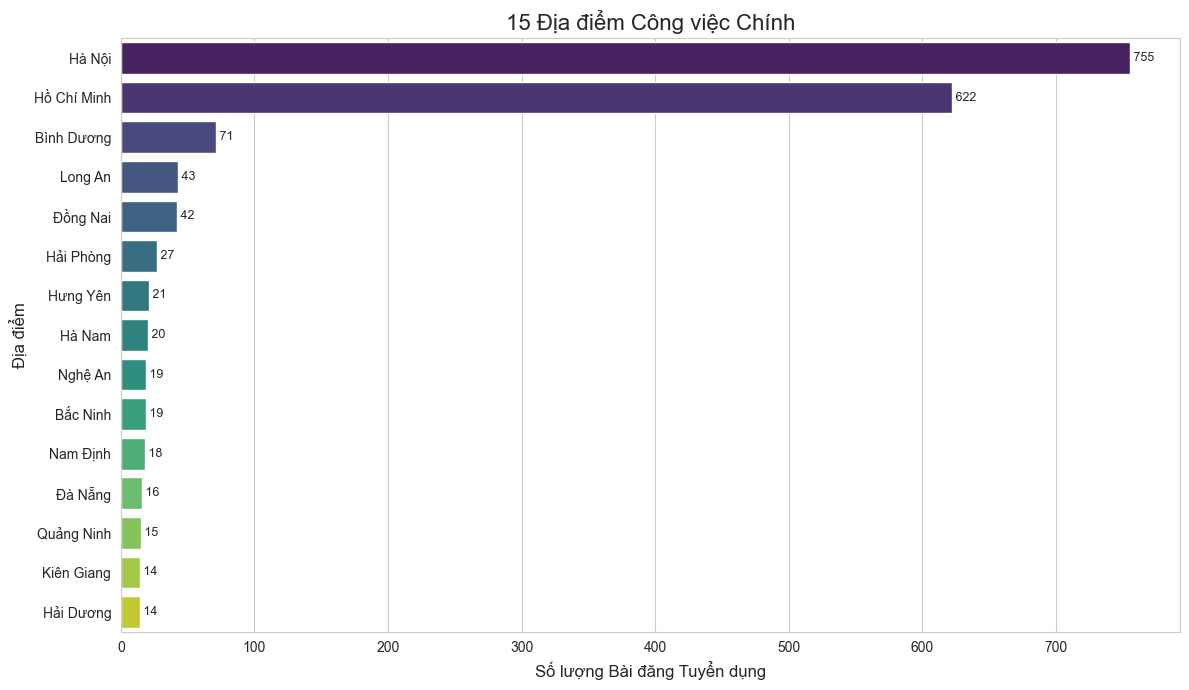

In [451]:
# --- Visualization ---
# 1. Các địa điểm công việc chính
plt.figure(figsize=(12, 7))
top_locations = df['primary_location'].value_counts().nlargest(15)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.title('15 Địa điểm Công việc Chính', fontsize=16)
plt.xlabel('Số lượng Bài đăng Tuyển dụng', fontsize=12)
plt.ylabel('Địa điểm', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(top_locations.values):
    plt.text(value, index, f' {value}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12656\694814141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


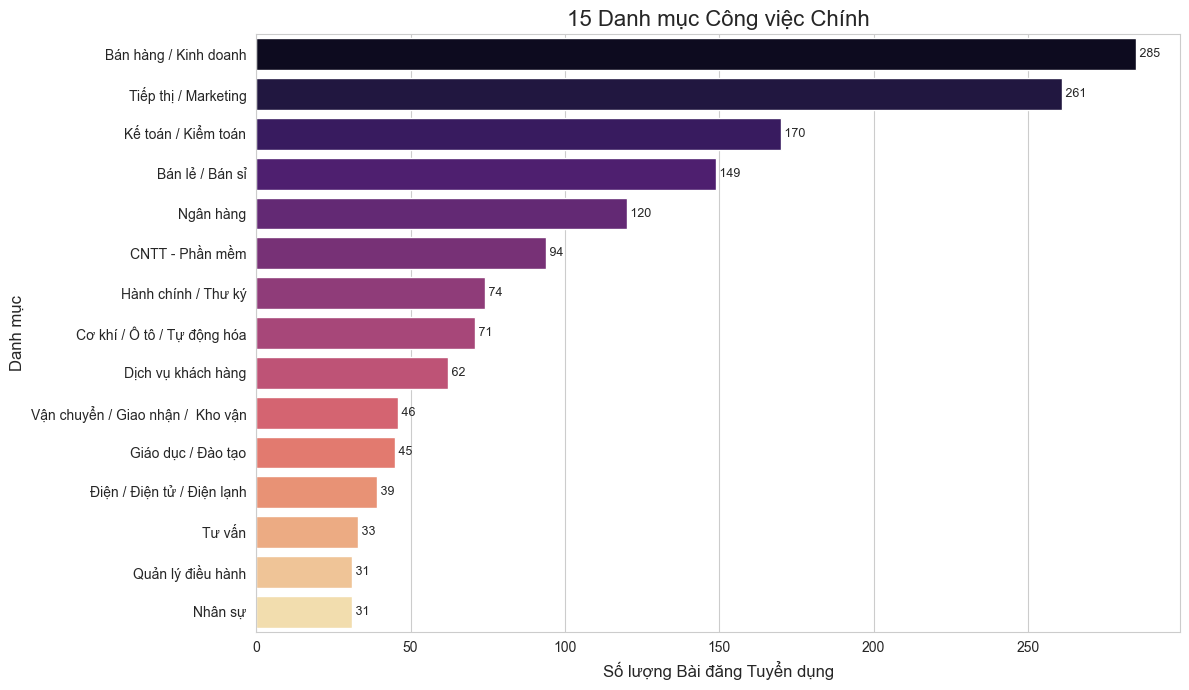

In [452]:
# 2. Các danh mục công việc chính
plt.figure(figsize=(12, 7))
top_categories = df['primary_category'].value_counts().nlargest(15)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")
plt.title('15 Danh mục Công việc Chính', fontsize=16)
plt.xlabel('Số lượng Bài đăng Tuyển dụng', fontsize=12)
plt.ylabel('Danh mục', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(top_categories.values):
    plt.text(value, index, f' {value}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

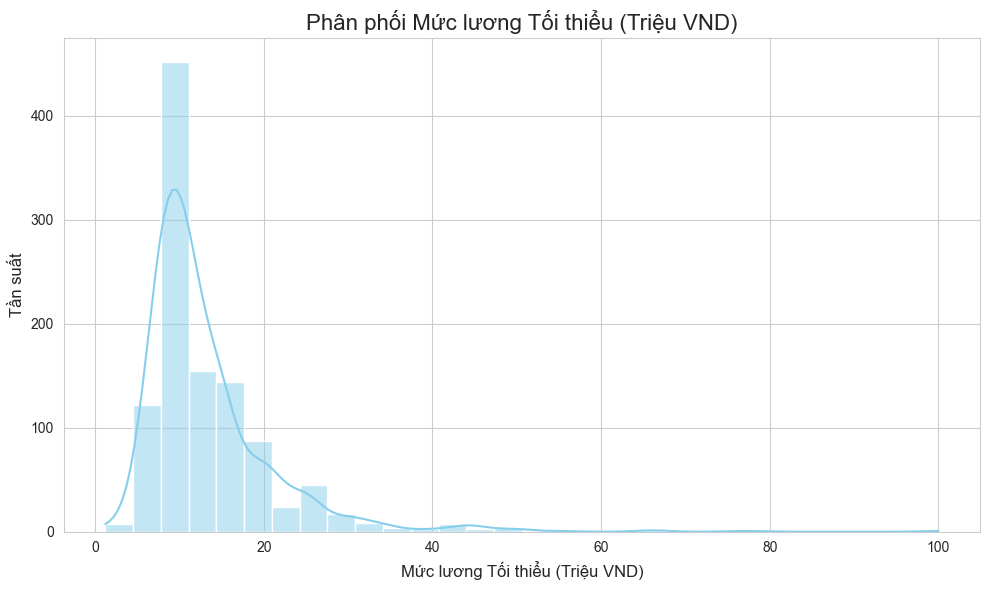

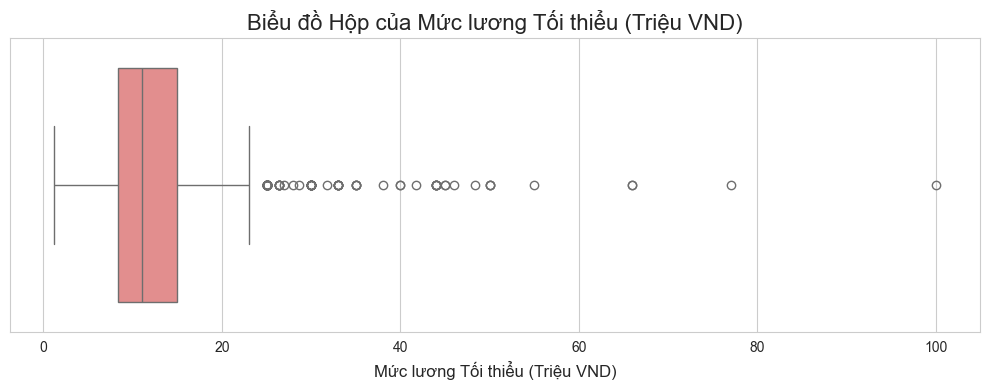

In [453]:
# 3. Phân phối Mức lương Tối thiểu
plt.figure(figsize=(10, 6))
sns.histplot(df['min_salary_mil_vnd'].dropna(), bins=30, kde=True, color="skyblue")
plt.title('Phân phối Mức lương Tối thiểu (Triệu VND)', fontsize=16)
plt.xlabel('Mức lương Tối thiểu (Triệu VND)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['min_salary_mil_vnd'].dropna(), color="lightcoral")
plt.title('Biểu đồ Hộp của Mức lương Tối thiểu (Triệu VND)', fontsize=16)
plt.xlabel('Mức lương Tối thiểu (Triệu VND)', fontsize=12)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

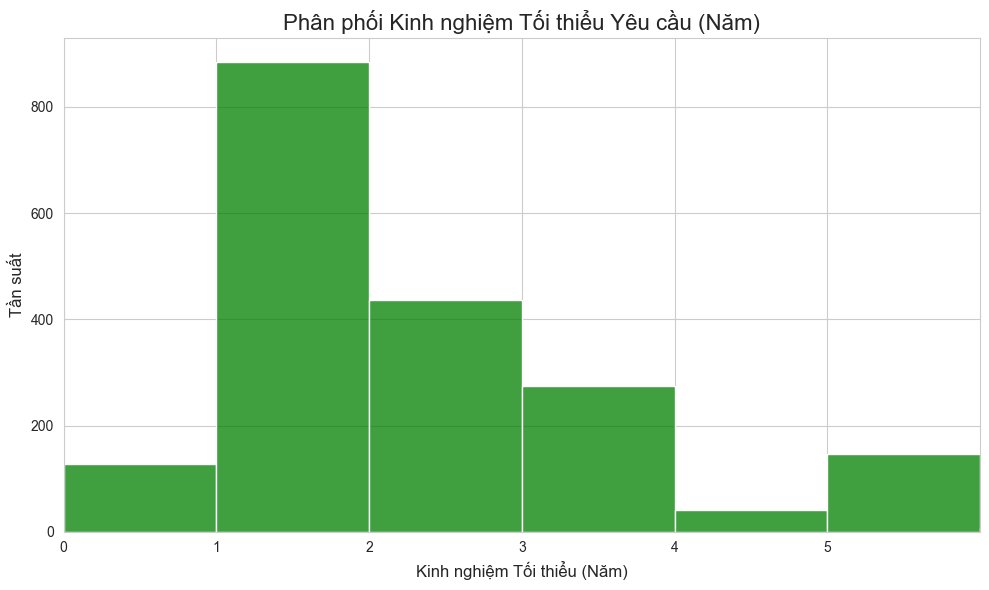

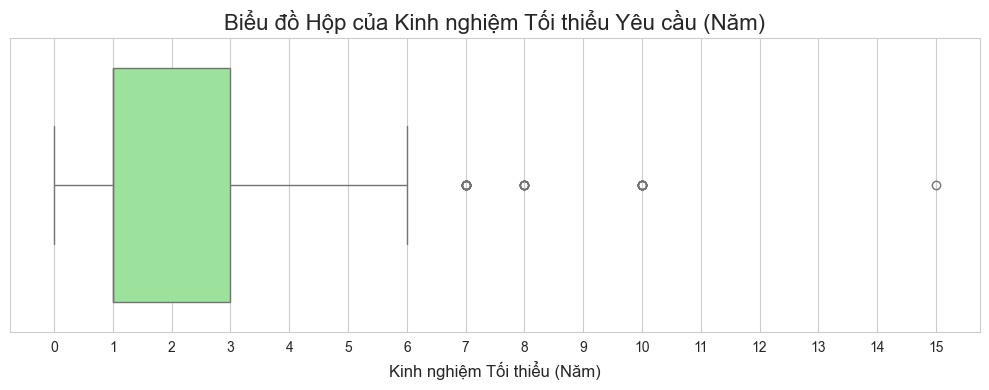

In [454]:
# 4. Phân phối Kinh nghiệm Tối thiểu
valid_experience = df['min_experience_years'].replace([np.inf, -np.inf], np.nan).dropna()
plt.figure(figsize=(10, 6))
sns.histplot(valid_experience, bins=15, kde=False, color="green")
plt.title('Phân phối Kinh nghiệm Tối thiểu Yêu cầu (Năm)', fontsize=16)
plt.xlabel('Kinh nghiệm Tối thiểu (Năm)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
max_exp_display = valid_experience.quantile(0.95) if not valid_experience.empty else 10
if pd.notna(max_exp_display):
  plt.xticks(np.arange(0, max_exp_display + 1 , 1))
  plt.xlim(0, max_exp_display + 1)
else:
  plt.xticks(np.arange(0, 11 , 1))
  plt.xlim(0, 10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=valid_experience, color="lightgreen")
plt.title('Biểu đồ Hộp của Kinh nghiệm Tối thiểu Yêu cầu (Năm)', fontsize=16)
plt.xlabel('Kinh nghiệm Tối thiểu (Năm)', fontsize=12)
max_val_exp = valid_experience.max()
if pd.notna(max_val_exp):
    plt.xticks(np.arange(0, max_val_exp + 1 , 1))
else:
    plt.xticks(np.arange(0, 11, 1))
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12656\2849735091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


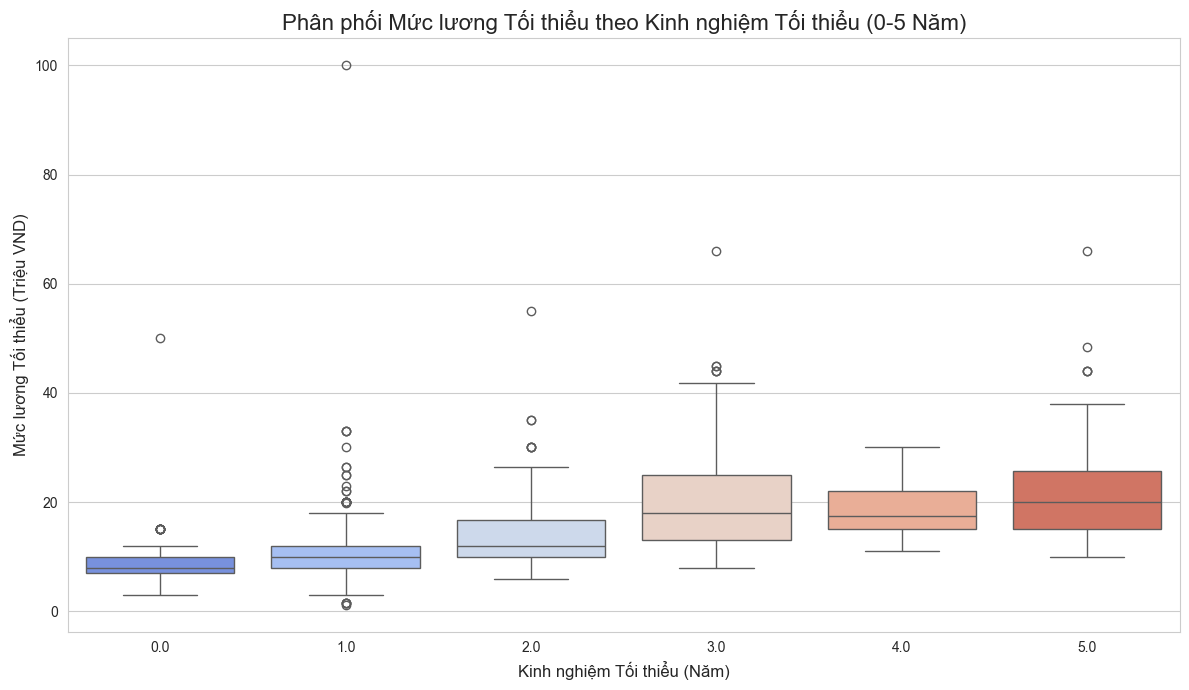

In [455]:
# 5. Kinh nghiệm so với Mức lương
exp_salary_df = df[['min_experience_years', 'min_salary_mil_vnd']].dropna()
exp_salary_df = exp_salary_df.replace([np.inf, -np.inf], np.nan).dropna()
exp_salary_filtered = exp_salary_df[exp_salary_df['min_experience_years'] <= 5]

plt.figure(figsize=(12, 7))
sns.boxplot(
    x='min_experience_years',
    y='min_salary_mil_vnd',
    data=exp_salary_filtered,
    palette="coolwarm"
)
plt.title('Phân phối Mức lương Tối thiểu theo Kinh nghiệm Tối thiểu (0-5 Năm)', fontsize=16)
plt.xlabel('Kinh nghiệm Tối thiểu (Năm)', fontsize=12)
plt.ylabel('Mức lương Tối thiểu (Triệu VND)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()